# Import torch, torchvision, numpy...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import scipy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset, Dataset


import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

import utils

# Datasets

## Download (MNIST, SVHN, COMBINED )

In [3]:
#Mean: tensor([0 1309, 0.1309, 0.1309])
#Standard Deviation: tensor([0.2893, 0.2893, 0.2893])
train_dataset_mnist = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.Compose([transforms.Grayscale(3),
                                    transforms.Resize((32, 32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,            
)
test_dataset_mnist = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transforms.Compose([transforms.Grayscale(3),
                                    transforms.Resize((32, 32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
)


#Mean: tensor([0.4377, 0.4438, 0.4728])
#Standard Deviation: tensor([0.1980, 0.2010, 0.1970])
train_dataset_svhn = datasets.SVHN(
    root = 'data/SVHN',
    split = 'train',
    transform = transforms.Compose([ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,            
)
test_dataset_svhn = datasets.SVHN(
    root = 'data/SVHN', 
    split = 'test', 
    transform = transforms.Compose([ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,
)

## Creating a Concatened Dataset
train_dataset_combined = ConcatDataset([train_dataset_mnist,train_dataset_svhn])
test_dataset_combined = ConcatDataset([test_dataset_mnist,test_dataset_svhn])



# dataloaders
train_dataloader_mnist = torch.utils.data.DataLoader(train_dataset_mnist,batch_size=64, shuffle=False)
test_dataloader_mnist = torch.utils.data.DataLoader(test_dataset_mnist,batch_size=64, shuffle=False)

train_dataloader_svhn = torch.utils.data.DataLoader(train_dataset_svhn,batch_size=64, shuffle=False)
test_dataloader_svhn = torch.utils.data.DataLoader(test_dataset_svhn,batch_size=64, shuffle=False)

train_dataloader_combined = DataLoader(train_dataset_combined, batch_size=64, shuffle=False)
test_dataloader_combined = DataLoader(test_dataset_combined, batch_size=64, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

classes_20 = ["0-mnist", "1-mnist", "2-mnist", "3-mnist", "4-mnist", "5-mnist", "6-mnist", "7-mnist", "8-mnist", "9-mnist",
           "0-svhn", "1-svhn", "2-svhn", "3-svhn", "4-svhn", "5-svhn", "6-svhn", "7-svhn", "8-svhn", "9-svhn"]

In [ ]:
# Calculate mean and std
#mean, std = get_mean_and_std(test_loader)
#print(f'Mean: {mean}')
#print(f'Standard Deviation: {std}')

## Print Datasets


### MNIST

torch.Size([28, 28])


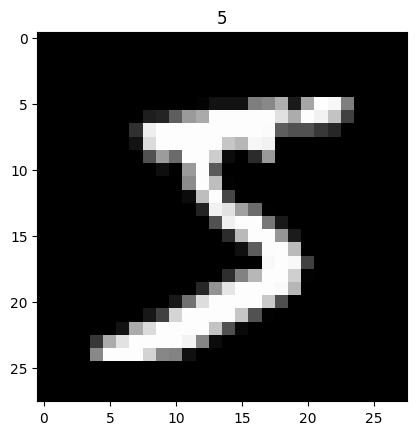

torch.Size([3, 32, 32])


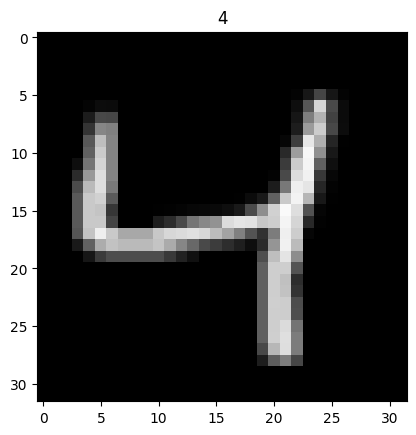

In [69]:
print(train_dataset_mnist.data[0].shape)
plt.imshow(train_dataset_mnist.data[0], cmap='gray')

# print(train_data[0][0][0].shape)
# plt.imshow(train_data[0][0][0], cmap='gray')

plt.title('%i' % train_dataset_mnist.targets[0])
plt.show()

plt.figure()
print(train_dataset_mnist[0][0].shape)

plt.title('%i' % train_dataset_mnist.targets[2])
imshow(train_dataset_mnist[2][0])
plt.show()

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_mnist), size=(1,)).item()
    img = train_dataset_mnist.data[sample_idx]
    label = train_dataset_mnist.targets[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

### SVHN

torch.Size([3, 32, 32])


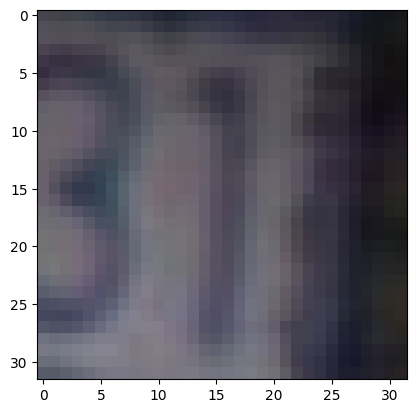

In [68]:
plt.figure()
print(train_dataset_svhn[0][0].shape)
imshow(train_dataset_svhn[9][0])

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_svhn), size=(1,)).item()
    img, label = train_dataset_svhn[sample_idx]
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    # plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

### Concatened

6


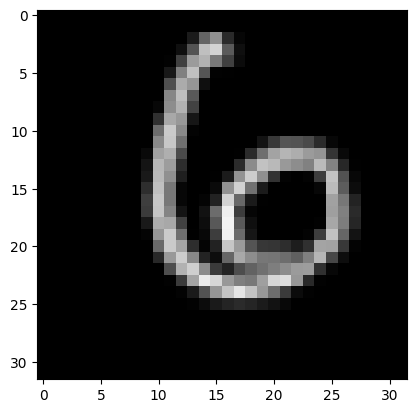

6


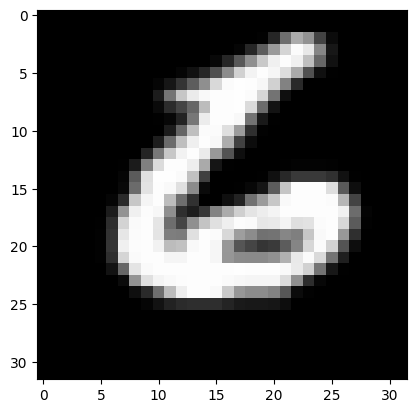

5


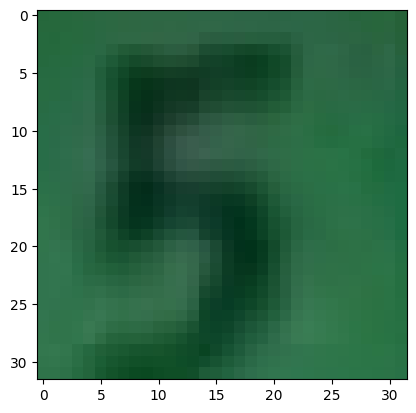

7


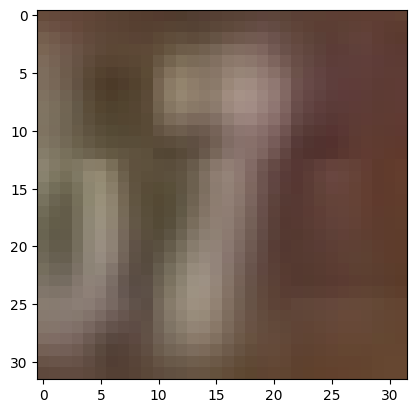

In [70]:
# Inicio
print(test_dataset_combined[100][1])
imshow(test_dataset_combined[100][0])
#mnist 0 - 9999
print(test_dataset_combined[9999][1])
imshow(test_dataset_combined[9999][0])
# Fim


# svhn 10000 - 36031
print(test_dataset_combined[10000][1])
imshow(test_dataset_combined[10000][0])
print(test_dataset_combined[36031][1])
imshow(test_dataset_combined[36031][0])
# Fim


# Models

## Create or Load

In [4]:
model_mnist = utils.create_resnet_model()
model_svhn = utils.create_resnet_model()
model_combined = utils.create_resnet_model()

In [5]:
model_mnist = utils.create_resnet_model('./my_weights/mnist.pth')
model_svhn = utils.create_resnet_model('./my_weights/svhn.pth')
model_combined = utils.create_resnet_model('./my_weights/combined.pth')

## Train and Save

In [6]:

# train(model_mnist, train_dataloader_mnist, device, epochs=10, lr=0.001)
# torch.save(model_mnist.state_dict(), './my_weights/mnist.pth')


# train(model_svhn, train_dataloader_svhn, device, epochs=10, lr=0.001)
# torch.save(model_svhn.state_dict(), './my_weights/svhn.pth')


# train(model_combined, train_dataloader_combined, device, epochs=10, lr=0.001)
# torch.save(model_combined.state_dict(), './my_weights/combined.pth')

## Evaluate

In [7]:
# Test each model in itself dataset
test_loss, accuracy = utils.evaluate(model_mnist, test_dataloader_mnist)
print(f"model_mnist - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_svhn, test_dataloader_svhn)
print(f"model_svhn - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_combined, test_dataloader_combined)
print(f"model_combined - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

model_mnist - Test Loss: 0.0295, Accuracy: 99.29
model_svhn - Test Loss: 0.2867, Accuracy: 93.10
model_combined - Test Loss: 0.2748, Accuracy: 93.42


In [11]:
# Test each model in combined dataset
test_loss, accuracy = utils.evaluate(model_mnist, test_dataloader_combined)
print(f"model_mnist - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_svhn, test_dataloader_combined)
print(f"model_svhn - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_combined, test_dataloader_combined)
print(f"model_combined - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

model_mnist - Test Loss: 4.0137, Accuracy: 43.71
model_svhn - Test Loss: 0.6263, Accuracy: 85.31
model_combined - Test Loss: 0.2748, Accuracy: 93.42


# Test copycat_framework

In [292]:
#mnist
compare_models_in_dataloader('./my_weights/mnist.pth', './weights_primeiro/mnist.pth', test_dataloader_mnist)

./my_weights/mnist.pth - Test Loss: 0.0295, Accuracy: 99.29%
./weights_primeiro/mnist.pth - Test Loss: 2.5911, Accuracy: 11.68%


In [293]:
#svhn
compare_models_in_dataloader('./my_weights/svhn.pth', './weights_primeiro/svhn.pth', test_dataloader_svhn)

./my_weights/svhn.pth - Test Loss: 0.2867, Accuracy: 93.10%
./weights_primeiro/svhn.pth - Test Loss: 2.3238, Accuracy: 14.39%


In [294]:
#combined (mnist+svhn)
compare_models_in_dataloader('./my_weights/combined.pth', './weights_primeiro/copycat_mnist.pth', test_dataloader_combined)

./my_weights/combined.pth - Test Loss: 0.2748, Accuracy: 93.42%
./weights_primeiro/copycat_mnist.pth - Test Loss: 5.5453, Accuracy: 11.13%


# Copycat